In [1]:
# librerias de arquitectura
from arquitectura import  *
import procesamiento
from torch.utils.data import TensorDataset, DataLoader
import torch
import torch.nn as nn
import pickle
import matplotlib.pyplot as plt
import numpy as np

c:\Users\nicoi\anaconda3\envs\int\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
with open('./td_ztf_stamp_17_06_20.pkl', 'rb') as f:
        full_data = pickle.load(f)
print(full_data.keys())

dict_keys(['Train', 'Validation', 'Test'])


In [3]:
data_train=procesamiento.recorte(full_data["Train"]["images"],21)
data_val=procesamiento.recorte(full_data["Validation"]["images"],21)
data_test=procesamiento.recorte(full_data["Test"]["images"],21)


In [4]:
model_load = AutoEncoderV3() # we do not specify pretrained=True, i.e. do not load default weights
model_load.load_state_dict(torch.load('modelo_entrenadov3.pth'))

<All keys matched successfully>

In [5]:
data_tuples = [(x, y) for (x, y) in data_test] # Separamos el dataset en X, y
X_test = torch.stack([t[0] for t in data_tuples])

data_tuples = [(x, y) for (x, y) in data_train] # Separamos el dataset en X, y
X_train = torch.stack([t[0] for t in data_tuples])

data_tuples = [(x, y) for (x, y) in data_val] # Separamos el dataset en X, y
X_val = torch.stack([t[0] for t in data_tuples])

In [6]:
model_load.cpu()

AutoEncoderV3(
  (encoder): Sequential(
    (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=same)
    (1): ReLU()
    (2): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=same)
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=same)
    (6): ReLU()
    (7): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=same)
    (8): ReLU()
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=same)
    (11): ReLU()
    (12): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=same)
    (13): ReLU()
    (14): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (15): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=same)
    (16): ReLU()
    (17): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=

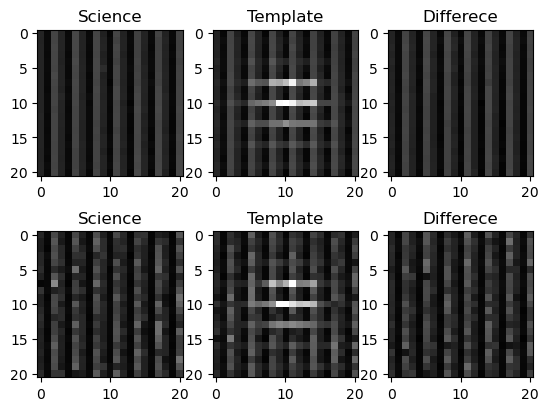

In [7]:
numero=21
result=model_load(X_test[numero].reshape(1,3,21,21))
result=result.reshape(3,21,21)
result=result.detach().numpy()

figure, axis = plt.subplots(2, 3)
  
# For Sine Function
axis[0, 0].imshow(result[0], cmap='gray', vmin=0, vmax=1)
axis[0, 0].set_title("Science")
  
# For Cosine Function
axis[0, 1].imshow(result[1], cmap='gray', vmin=0, vmax=1)
axis[0, 1].set_title("Referece")
  
# For Tangent Function
axis[0, 2].imshow(result[2], cmap='gray', vmin=0, vmax=1)
axis[0, 2].set_title("Differece")
  
# For Tanh Function
axis[1, 0].imshow(X_test[numero][0].numpy(), cmap='gray', vmin=0, vmax=1)
axis[1, 0].set_title("Science")

axis[1, 1].imshow(X_test[numero][1].numpy(), cmap='gray', vmin=0, vmax=1)
axis[1, 1].set_title("Referece")

axis[1, 2].imshow(X_test[numero][2].numpy(), cmap='gray', vmin=0, vmax=1)
axis[1, 2].set_title("Differece")
# Combine all the operations and display
plt.show()

In [15]:
from sklearn.preprocessing import StandardScaler

vector_train = model_load.encoder(X_train).reshape(X_train.shape[0],128).detach().numpy()
scaler = StandardScaler()
scaler.fit(vector_train)
Vector_train = scaler.transform(vector_train)

vector_test = model_load.encoder(X_test).reshape(X_test.shape[0],128).detach().numpy()
vector_test = scaler.transform(vector_test)

vector_val = model_load.encoder(X_val).reshape(X_val.shape[0],128).detach().numpy()
Vector_val = scaler.transform(vector_val)

[]

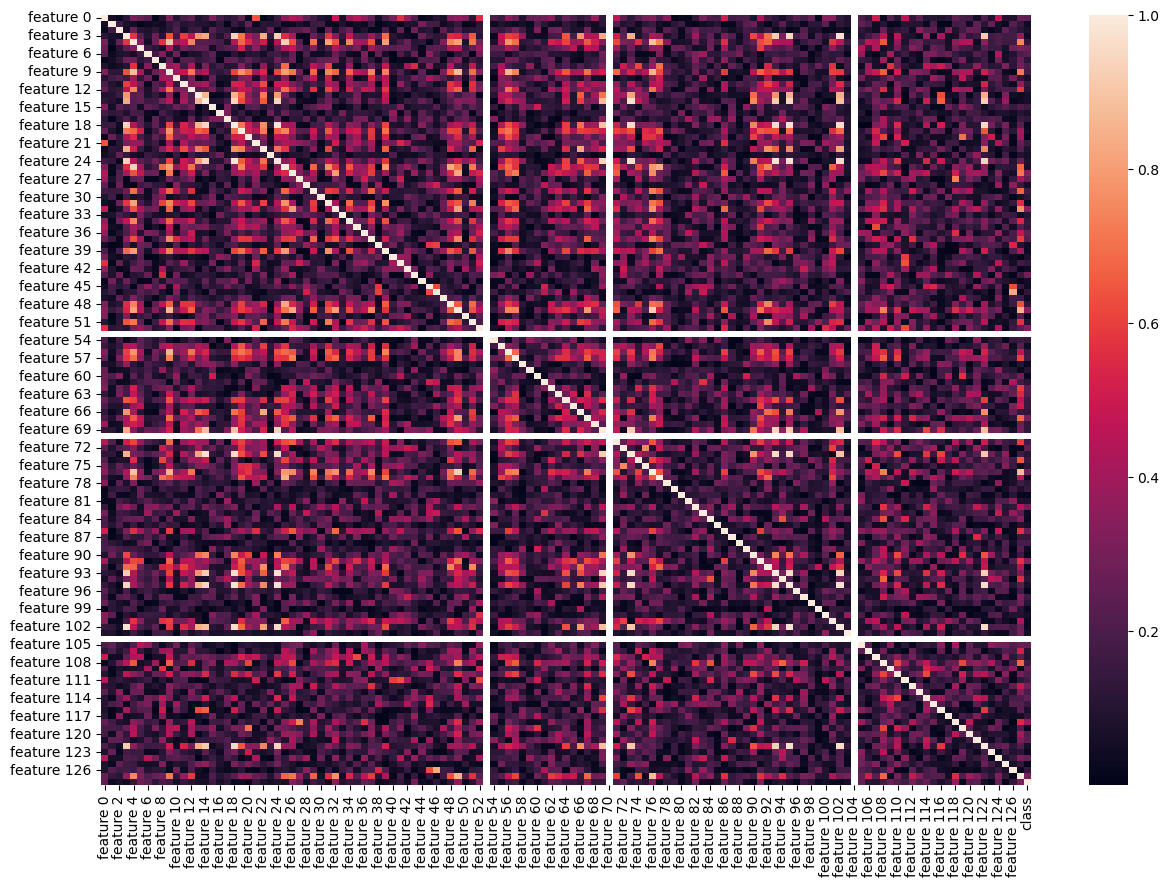

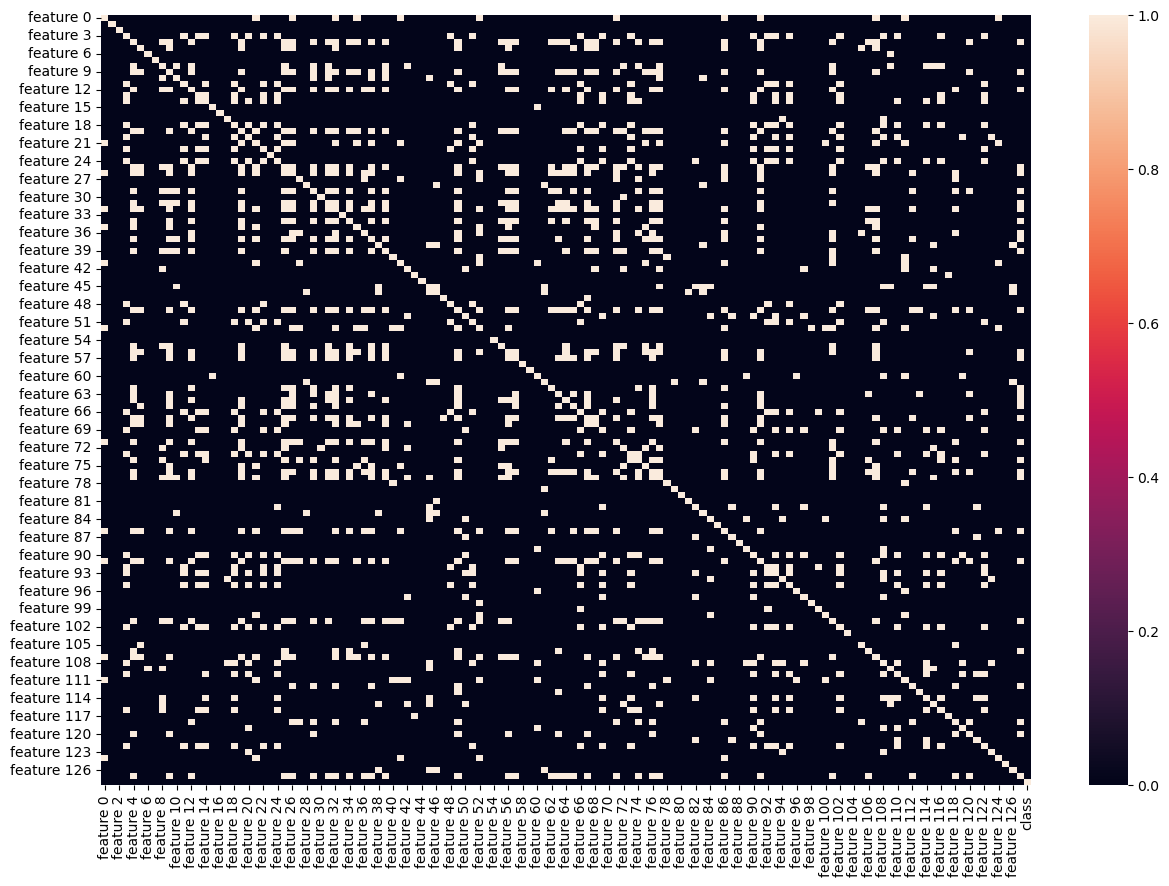

In [16]:
import numpy as np 
import seaborn as sns
import pandas as pd
# duda features y numero


x = Vector_train
y = full_data["Train"]["labels"]
  
df_1 = pd.DataFrame(x,columns=["feature "+str(i) for i in range(128)])
df_2 = pd.DataFrame(y,columns=["class"])
df = pd.concat([df_1, df_2],axis=1)
fig = plt.subplots( figsize=(15, 10))
sns.heatmap(abs(df.corr()))
plt.plot()
fig = plt.subplots( figsize=(15, 10))
sns.heatmap(abs(df.corr()>0.4))
plt.plot()

In [17]:
from sklearn import svm
from sklearn.preprocessing import StandardScaler

X = Vector_train
y = full_data["Train"]["labels"]

rbf_svc = svm.SVC(kernel='rbf')
rbf_svc.fit(X,y)

SVC()

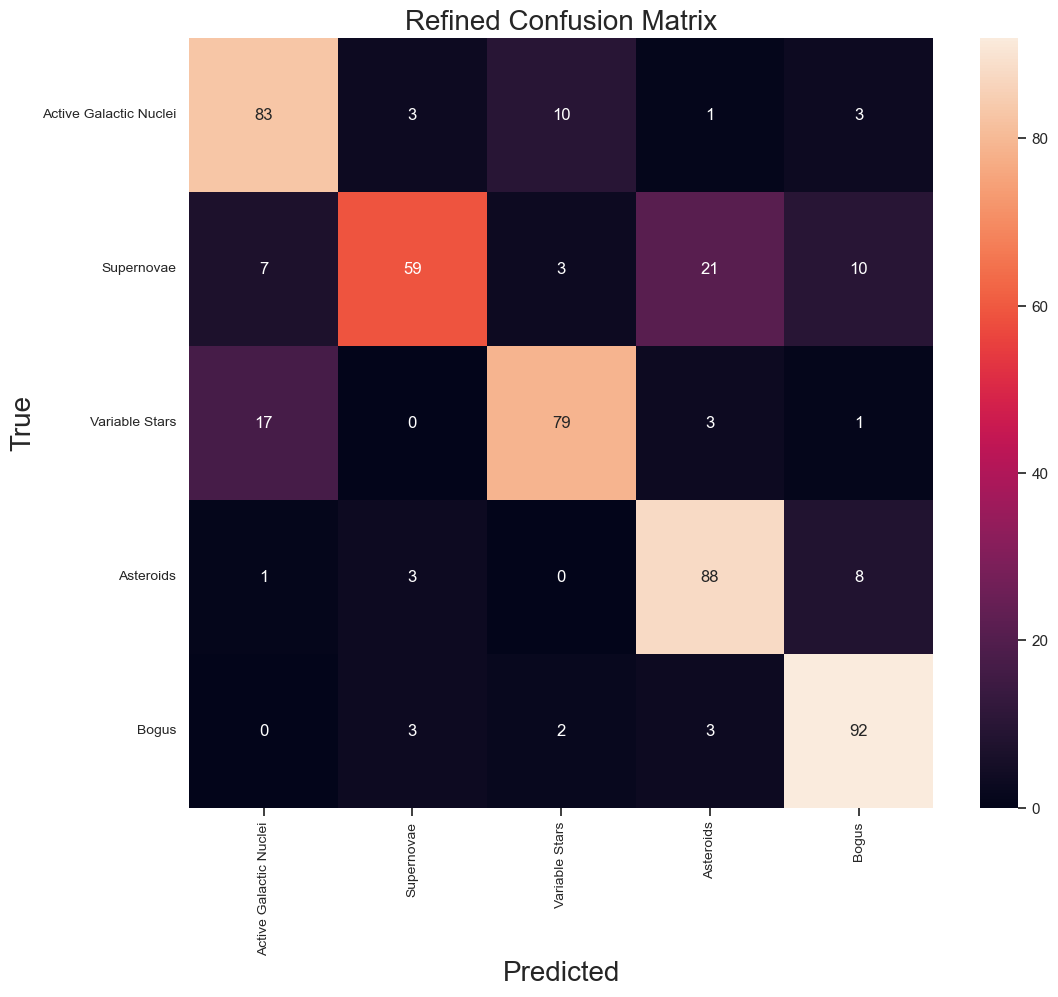

In [32]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

X_test=vector_test
predict=rbf_svc.predict(X_test)

class_prediction = predict
# https://stackoverflow.com/questions/65618137/confusion-matrix-for-multiple-classes-in-python


# labels = le.classes_
class_names =  ["Active Galactic Nuclei","Supernovae","Variable Stars","Asteroids","Bogus"]

cm = confusion_matrix(full_data["Test"]["labels"], class_prediction)
fig = plt.figure(figsize=(12, 10))
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt = 'g'); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted', fontsize=20)
ax.xaxis.set_label_position('bottom')
plt.xticks(rotation=90)
ax.xaxis.set_ticklabels(class_names, fontsize = 10)
ax.xaxis.tick_bottom()

ax.set_ylabel('True', fontsize=20)
ax.yaxis.set_ticklabels(class_names, fontsize = 10)
plt.yticks(rotation=0)

plt.title('Refined Confusion Matrix', fontsize=20)

# plt.savefig('ConMat24.png')
plt.show()

In [9]:
# # librerias
# from sklearn.svm import SVC
# from sklearn.model_selection import GridSearchCV
# import numpy as np
# import time as tm

# # se crea el SVM con los parametros a iterar
# tiempo_inicial = tm.time()
# svc_linear = SVC()
# parameters = {'kernel': ['linear'], 'C': [1, 5, 10, 100]}
# svc_linear_grid = GridSearchCV(svc_linear, parameters)
# # features y labels
# caracteristicas = vector_train
# clase = full_data["Train"]["labels"]

# # ajuste
# svc_linear_grid.fit(caracteristicas, clase)
# tiempo_final = tm.time()
# # prediccion y desicision
# resultado_linear = svc_linear_grid.predict(vector_val)
# funcion_linear = svc_linear_grid.decision_function(
#     vector_val)

# print("Mejores parametros: "+str(svc_linear_grid.best_params_))
# print("El tiempo del mejor: "+str(svc_linear_grid.refit_time_))
# print("Tiempo total: "+str(tiempo_final-tiempo_inicial))

c:\Users\nicoi\anaconda3\envs\int\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [ ]:
# from sklearn.metrics import roc_curve, RocCurveDisplay, auc
# fpr, tpr, _ = roc_curve(vector_val, funcion_linear)
# area = auc(fpr, tpr)
# # plot
# RocCurveDisplay(fpr=fpr, tpr=tpr, estimator_name="SVM LINEAL",
#                 roc_auc=area).plot()

In [ ]:
# tiempo_inicial = tm.time()
# svc_poly = SVC()
# parameters_poly = {'kernel': ['poly'], "degree": [
#     2, 3], "gamma": [2, 3, 4], 'C': [2, 3, 4]}
# svc_poly_grid = GridSearchCV(svc_poly, parameters_poly)
# # ajuste
# svc_poly_grid.fit(caracteristicas, clase)
# tiempo_final = tm.time()
# # prediccion y decision
# resultado_poly = svc_poly_grid.predict(vector_val)
# funcion_poly = svc_poly_grid.decision_function(
#     vector_val)

# print("Mejores parametros: "+str(svc_poly_grid.best_params_))
# print("El tiempo del mejor: "+str(svc_poly_grid.refit_time_))
# print("Tiempo total: "+str(tiempo_final-tiempo_inicial))

In [ ]:
# fpr, tpr, _ = roc_curve(vector_val, funcion_linear)
# area = auc(fpr, tpr)
# # plot
# RocCurveDisplay(fpr=fpr, tpr=tpr, estimator_name="SVM LINEAL",
#                 roc_auc=area).plot()

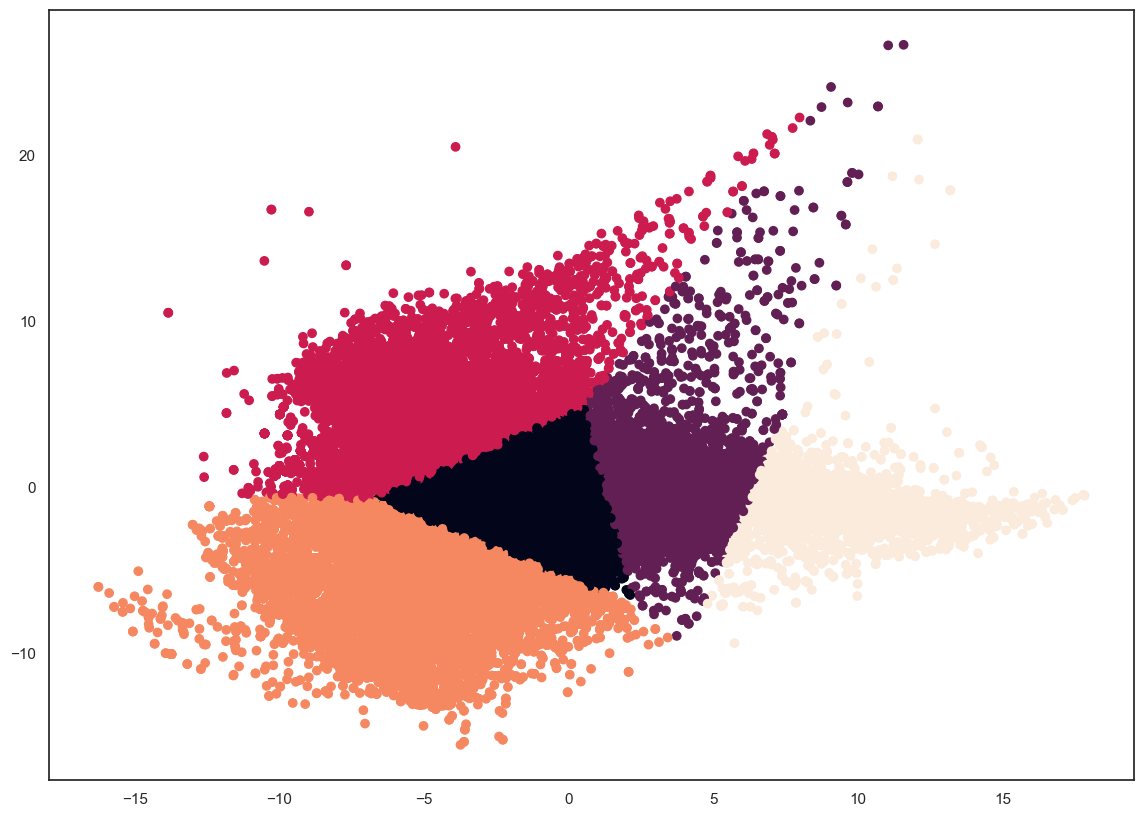

In [19]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
reduced_data = PCA(n_components=2).fit_transform(Vector_train)
kmeans = KMeans(init="k-means++", n_clusters=5)
kmeans.fit(reduced_data)
y_kmeans = kmeans.predict(reduced_data)




plt.scatter(reduced_data[:,0],reduced_data[:,1],c=y_kmeans)
plt.show()

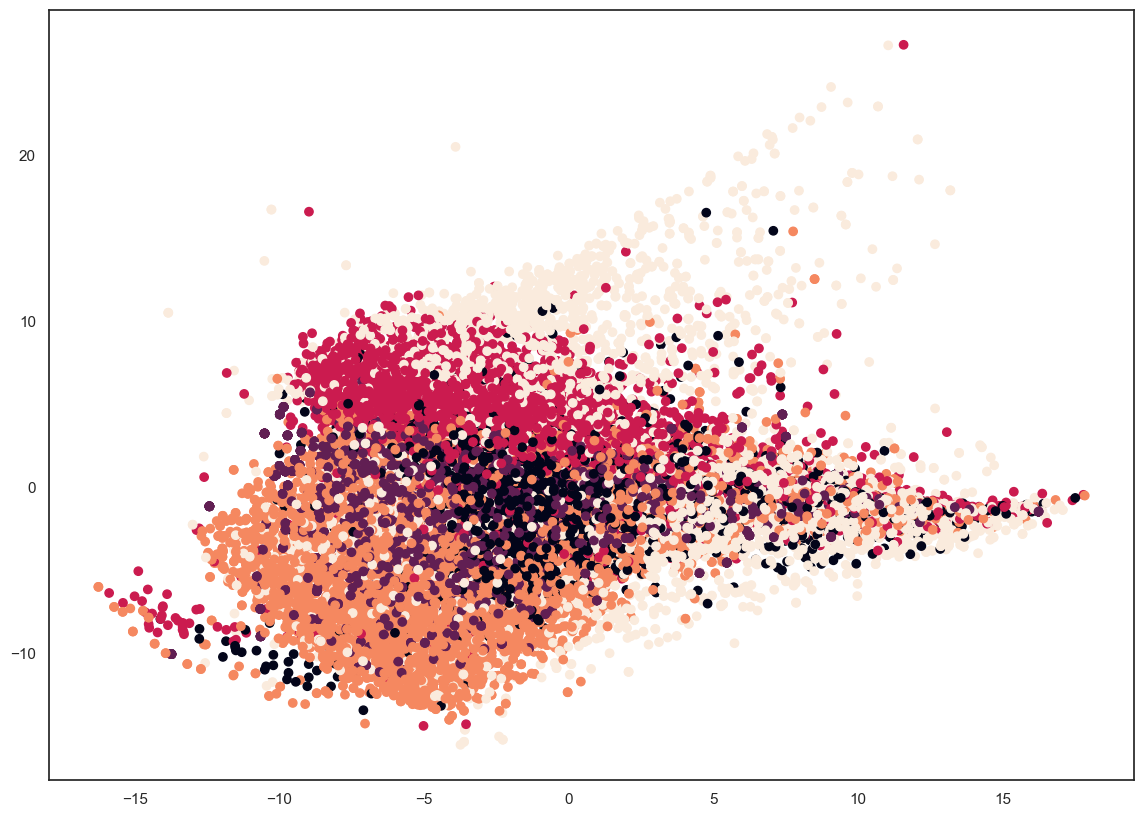

In [20]:
plt.scatter(reduced_data[:,0],reduced_data[:,1],c=full_data["Train"]["labels"])
plt.show()

In [21]:
from sklearn import manifold
from numpy.random import RandomState
rng = RandomState(0)
t_sne = manifold.TSNE(
    n_components=2,
    learning_rate="auto",
    perplexity=30,
    n_iter=250,
    init="random",
    random_state=rng,
)
v_t_sne = t_sne.fit_transform(Vector_train)

[]

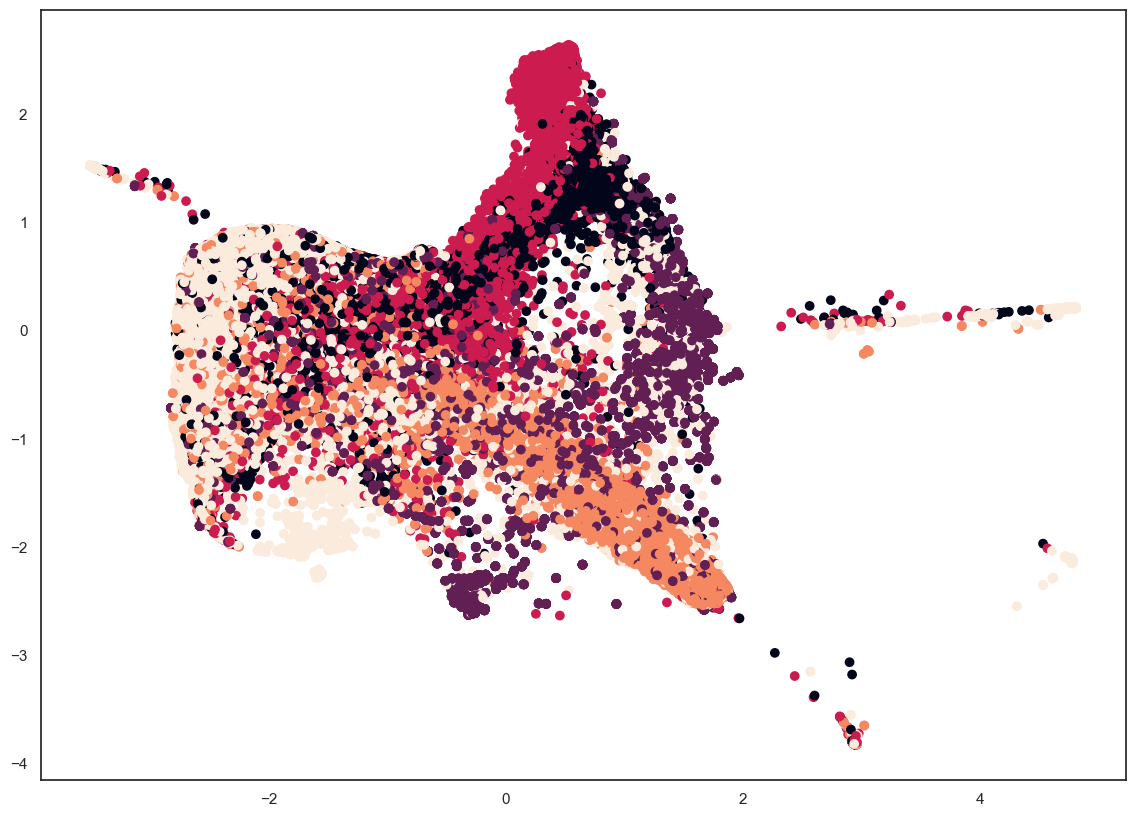

In [22]:
sns.set(style='white', context='notebook', rc={'figure.figsize':(14,10)})

plt.scatter(v_t_sne[:,0],v_t_sne[:,1],c=full_data["Train"]["labels"])
plt.plot()

In [28]:
import umap
reducer = umap.UMAP()
embedding = reducer.fit_transform(Vector_train)
embedding.shape

(72710, 2)

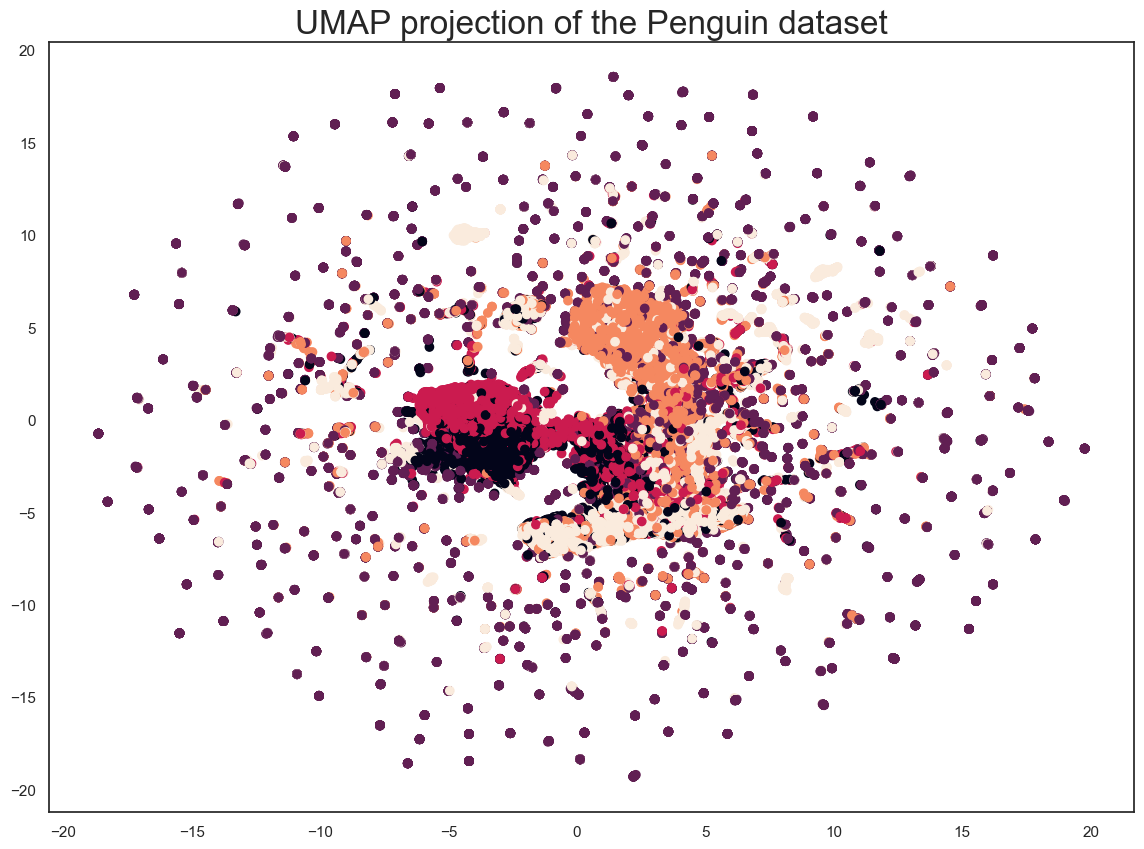

In [29]:
plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    c=full_data["Train"]["labels"])
# plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of the Penguin dataset', fontsize=24);

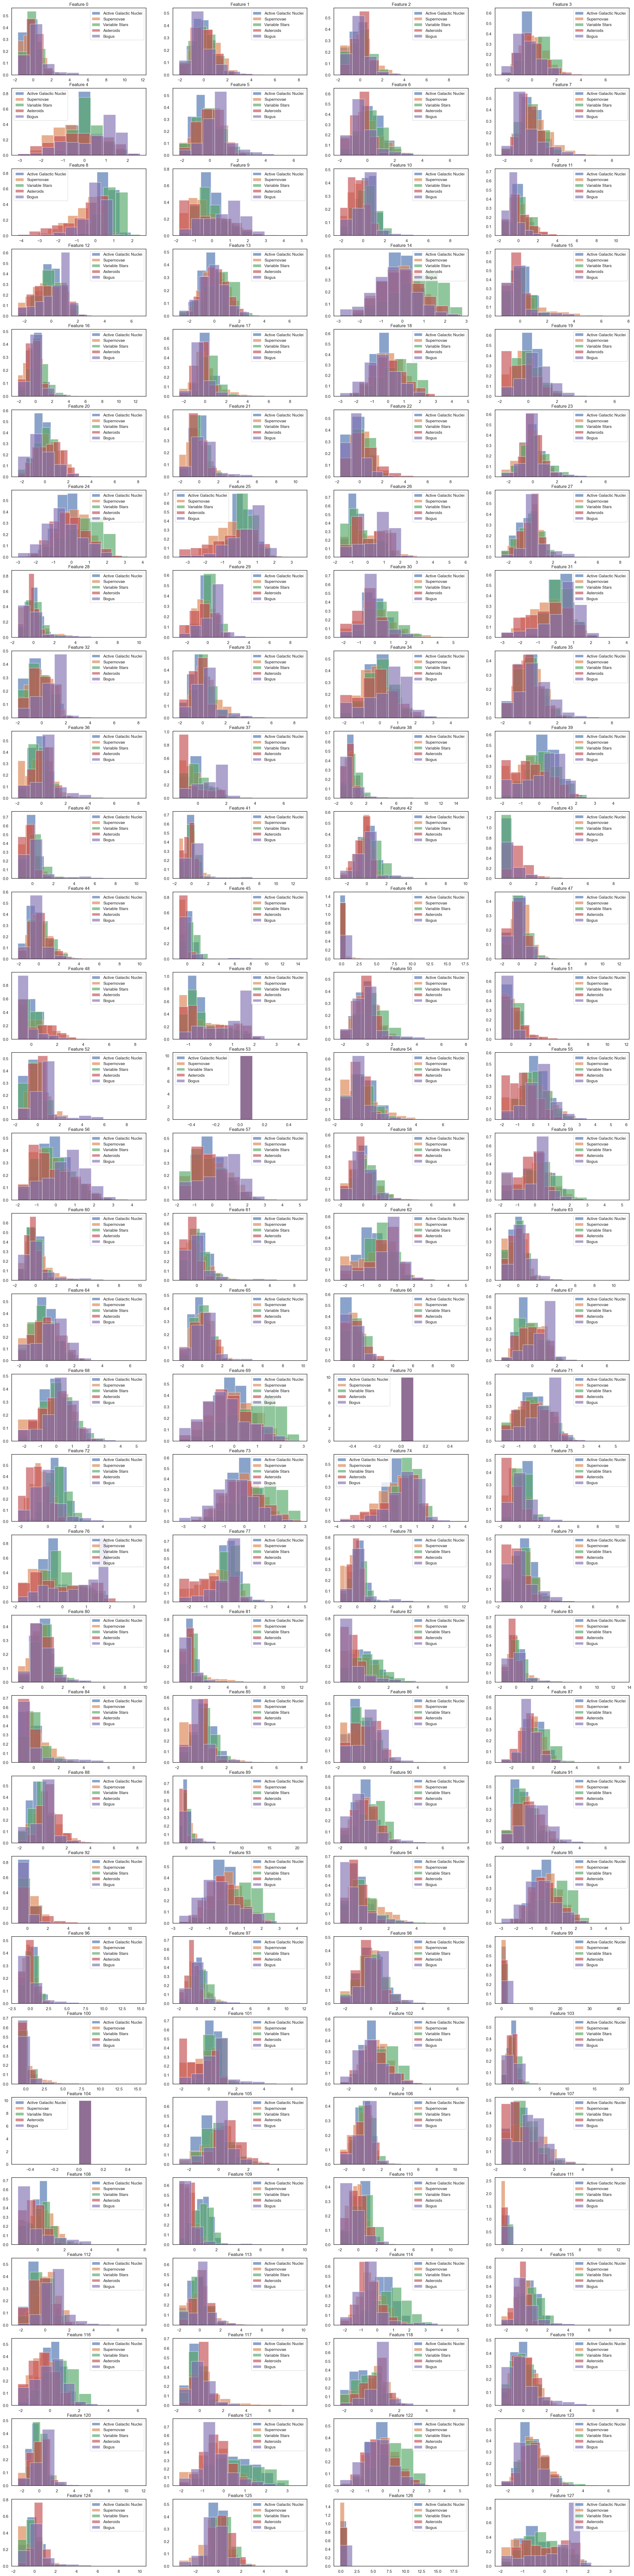

In [37]:
# duda de las clases y su correspondiente numero
fig, axes = plt.subplots(32, 4, figsize=(30, 125))
for pos, clase in enumerate(class_names):
    filtro=full_data["Train"]["labels"]==pos
    feature=0
    for k in range(32):
        for j in range(4):
            axes[k,j].hist(Vector_train[:,feature][filtro], label=clase,alpha = 0.65,density=True)
            axes[k,j].set_title(f"Feature {feature}")
            feature+=1
            
for k in range(32):
    for j in range(4):
        axes[k,j].legend()


In [38]:
# fig, axes = plt.subplots(25, 5, figsize=(20, 100))
# for i in range(5):
#     filtro=full_data["Train"]["labels"]==i
#     feature=0
#     for k in range(25):
#         for j in range(5):
#             axes[k,j].hist(vector_train[:,feature][filtro], label=i,alpha = 0.8,density=True)
#             axes[k,j].set_title(f"Feature {feature}")
            
#             feature+=1
            
#             # axes[i,j].legend()
# for k in range(25):
#     for j in range(5):
#         axes[k,j].legend()